## Project Name – Cab Fare Prediction

You are a cab rental start-up company. You have successfully run the pilot project and
now want to launch your cab service across the country. You have collected the
historical data from your pilot project and now have a requirement to apply analytics for
fare prediction. You need to design a system that predicts the fare amount for a cab ride
in the city.

In [86]:
#Load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
import math

In [180]:
train_df = pd.read_csv("./train_cab.csv")
test_df = pd.read_csv("./test.csv")

### Exploratory Data Analysis

In [181]:
train_df.head()
test_df.head()

,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2015-01-27 13:08:24 UTC,-73.973320,40.763805,-73.981430,40.743835,1
1,2015-01-27 13:08:24 UTC,-73.986862,40.719383,-73.998886,40.739201,1
2,2011-10-08 11:53:44 UTC,-73.982524,40.751260,-73.979654,40.746139,1
3,2012-12-01 21:12:12 UTC,-73.981160,40.767807,-73.990448,40.751635,1
4,2012-12-01 21:12:12 UTC,-73.966046,40.789775,-73.988565,40.744427,1


In [182]:


train_df["pickup_datetime"]=pd.to_datetime(train_df["pickup_datetime"],errors='coerce')
test_df["pickup_datetime"]=pd.to_datetime(test_df["pickup_datetime"],errors='coerce')


In [183]:
train_df["fare_amount"] = pd.to_numeric(train_df["fare_amount"] , errors='coerce')


In [184]:
train_df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,16042.000000,16067.000000,16067.000000,16067.000000,16067.000000,16012.000000
mean,15.015004,-72.462787,39.914725,-72.462328,39.897906,2.625070
std,430.460945,10.578384,6.826587,10.575062,6.187087,60.844122
min,-3.000000,-74.438233,-74.006893,-74.429332,-74.006377,0.000000
25%,6.000000,-73.992156,40.734927,-73.991182,40.734651,1.000000
50%,8.500000,-73.981698,40.752603,-73.980172,40.753567,1.000000
75%,12.500000,-73.966838,40.767381,-73.963643,40.768013,2.000000
max,54343.000000,40.766125,401.083332,40.802437,41.366138,5345.000000


In [185]:
test_df.describe()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000
mean,-73.974722,40.751041,-73.973657,40.751743,1.671273
std,0.042774,0.033541,0.039072,0.035435,1.278747
min,-74.252193,40.573143,-74.263242,40.568973,1.000000
25%,-73.992501,40.736125,-73.991247,40.735254,1.000000
50%,-73.982326,40.753051,-73.980015,40.754065,1.000000
75%,-73.968013,40.767113,-73.964059,40.768757,2.000000
max,-72.986532,41.709555,-72.990963,41.696683,6.000000


In [186]:
print(f"There are {len(train_df[train_df['fare_amount'] < 0])} negative fares.")
print(f"There are {len(train_df[train_df['fare_amount'] == 0])} $0 fares.")
print(f"There are {len(train_df[train_df['fare_amount'] > 100])} fares greater than $100.")

There are 3 negative fares.
There are 1 $0 fares.
There are 9 fares greater than $100.


In [187]:
train_df = train_df[train_df['fare_amount'].between(left = 2.5, right = 100)]


In [188]:
train_df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,16027.000000,16027.000000,16027.000000,16027.000000,16027.000000,15972.000000
mean,11.269636,-72.472867,39.920276,-72.472420,39.903395,2.624444
std,9.375223,10.544818,6.813129,10.541479,6.170564,60.918805
min,2.500000,-74.438233,-74.006893,-74.227047,-74.006377,0.000000
25%,6.000000,-73.992153,40.734950,-73.991182,40.734732,1.000000
50%,8.500000,-73.981704,40.752615,-73.980182,40.753577,1.000000
75%,12.500000,-73.966848,40.767366,-73.963666,40.768008,2.000000
max,96.000000,40.766125,401.083332,40.802437,41.366138,5345.000000


In [189]:
train_df.dtypes

fare_amount                      float64
pickup_datetime      datetime64[ns, UTC]
pickup_longitude                 float64
pickup_latitude                  float64
dropoff_longitude                float64
dropoff_latitude                 float64
passenger_count                  float64
dtype: object

In [190]:
train_df['pickup_year']=train_df['pickup_datetime'].dt.year
train_df['pickup_month']=train_df['pickup_datetime'].dt.month
test_df['pickup_year']=test_df['pickup_datetime'].dt.year
test_df['pickup_month']=test_df['pickup_datetime'].dt.month
 

In [191]:
train_df['pickup_hour']=train_df['pickup_datetime'].dt.hour
test_df['pickup_hour']=test_df['pickup_datetime'].dt.hour


In [192]:
train_df['longitude_diff']=(train_df['dropoff_longitude'] - train_df['pickup_longitude']).abs()
train_df['latitude_diff']=(train_df['dropoff_latitude'] - train_df['pickup_latitude']).abs()
test_df['longitude_diff']=(test_df['dropoff_longitude'] - test_df['pickup_longitude']).abs()
test_df['latitude_diff']=(test_df['dropoff_latitude'] - test_df['pickup_latitude']).abs()

In [193]:
def distance(x1, x2, y1, y2, p):
    return ((abs(x2 - x1) ** p) + (abs(y2 - y1)) ** p) ** (1 / p)

In [194]:

train_df['distance'] = distance(train_df['pickup_longitude'], train_df['dropoff_longitude'],
                                       train_df['pickup_latitude'], train_df['dropoff_latitude'], 2)

test_df['distance'] = distance(test_df['pickup_longitude'], test_df['dropoff_longitude'],
                                       test_df['pickup_latitude'], test_df['dropoff_latitude'], 2)


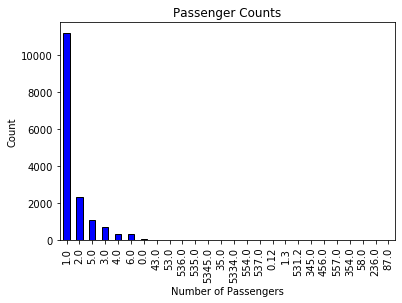

In [195]:
# Bin the fare and convert to string
train_df['fare-bin'] = pd.cut(train_df['fare_amount'], bins = list(range(0, 50, 10))).astype(str)
train_df['passenger_count'].value_counts().plot.bar(color = 'b', edgecolor = 'k');
plt.title('Passenger Counts'); plt.xlabel('Number of Passengers'); plt.ylabel('Count');

### From above graph we can see there is no contribution above 6 values hence I have remove any passenger counts greater than 6

In [196]:
train_df = train_df.loc[train_df['passenger_count'] < 6]

In [197]:
train_df.isnull().sum()

fare_amount          0
pickup_datetime      1
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
pickup_year          1
pickup_month         1
pickup_hour          1
longitude_diff       0
latitude_diff        0
distance             0
fare-bin             0
dtype: int64

In [198]:
# drop rows with missing values
train_df.dropna(inplace=True)

In [199]:
train_df.isnull().sum()

fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
pickup_year          0
pickup_month         0
pickup_hour          0
longitude_diff       0
latitude_diff        0
distance             0
fare-bin             0
dtype: int64

In [200]:
train_df.groupby('fare-bin')['distance'].agg(['mean', 'count'])

,mean,count
fare-bin,,
"(0.0, 10.0]",0.149549,9839
"(10.0, 20.0]",0.200474,4181
"(20.0, 30.0]",0.290899,815
"(30.0, 40.0]",0.122310,392
nan,0.776302,424


In [201]:

train_df.loc[train_df['fare-bin'] == 'nan', 'fare-bin'] = '[45+]'

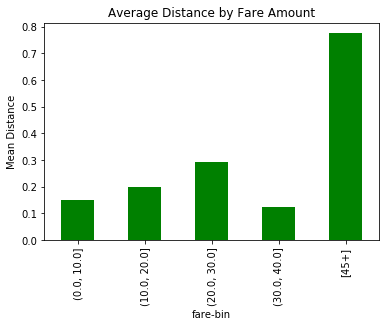

In [202]:
train_df.groupby('fare-bin')['distance'].mean().sort_index().plot.bar(color = 'g');
plt.title('Average Distance by Fare Amount');
plt.ylabel('Mean Distance');

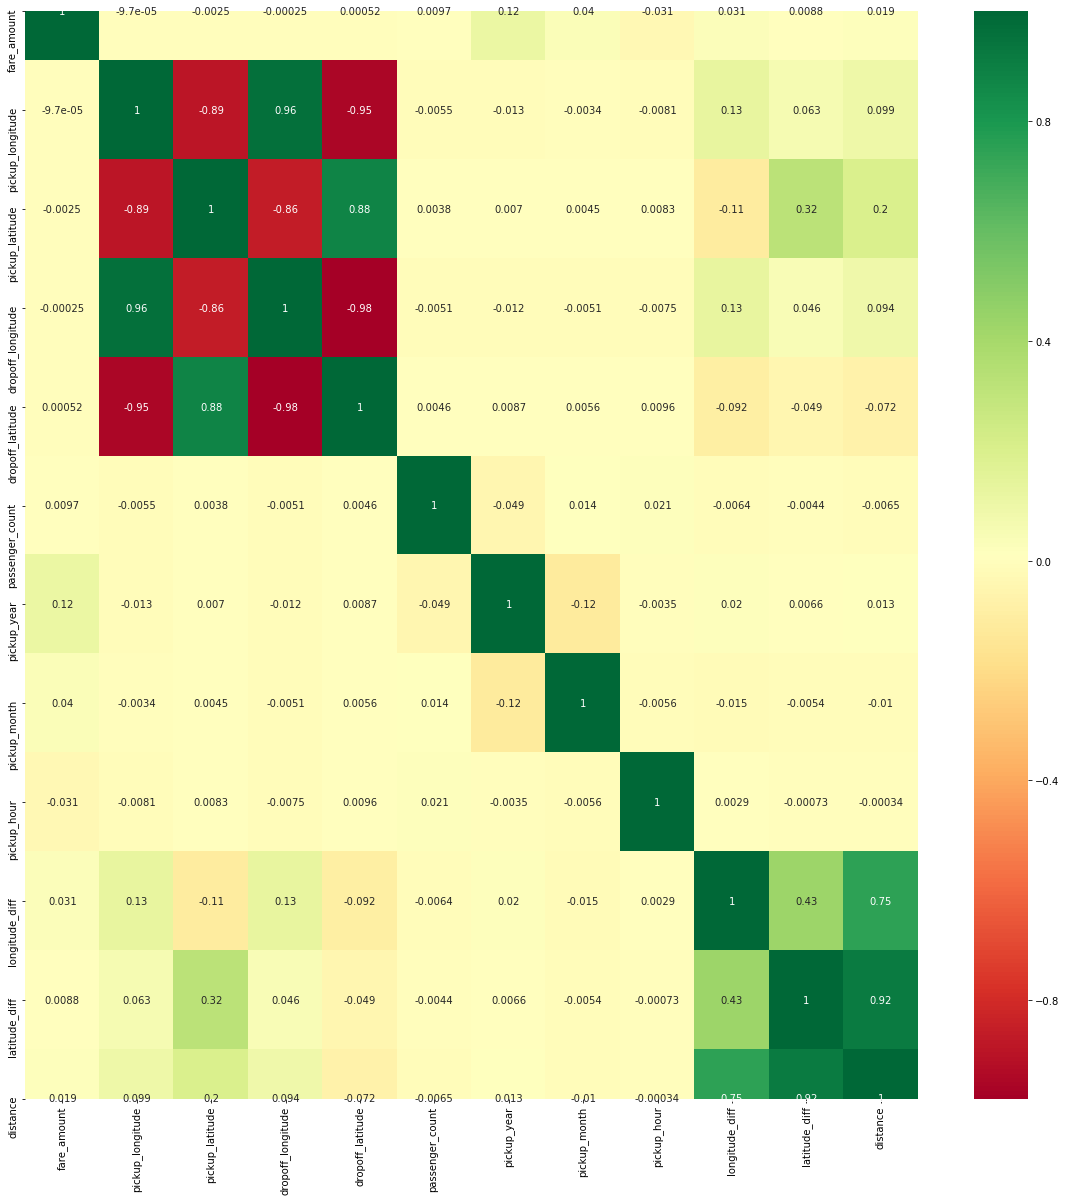

In [203]:
corrmat = train_df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(train_df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [204]:
import statsmodels.formula.api as smf

In [205]:
train_df.columns.tolist()

['fare_amount',
 'pickup_datetime',
 'pickup_longitude',
 'pickup_latitude',
 'dropoff_longitude',
 'dropoff_latitude',
 'passenger_count',
 'pickup_year',
 'pickup_month',
 'pickup_hour',
 'longitude_diff',
 'latitude_diff',
 'distance',
 'fare-bin']

In [206]:
## Let's estimate the model coefficients 
# create a fitted model
lm1 = smf.ols(formula='fare_amount ~ pickup_year+ pickup_month+pickup_longitude+pickup_latitude', data=train_df).fit()

# print the coefficients
lm1.params

Intercept          -1241.755869
pickup_year            0.622449
pickup_month           0.147986
pickup_longitude      -0.006712
pickup_latitude       -0.014222
dtype: float64

In [207]:
## Let's estimate the model coefficients 
# create a fitted model
lm1 = smf.ols(formula='fare_amount ~ dropoff_longitude+ dropoff_latitude+passenger_count+distance+longitude_diff+latitude_diff', data=train_df).fit()

# print the coefficients
lm1.params

Intercept            10.879753
dropoff_longitude    -0.005099
dropoff_latitude     -0.002987
passenger_count       0.082497
distance             -0.251401
longitude_diff        0.272568
latitude_diff         0.230196
dtype: float64

In [208]:
#Divide data into train and test
# train_df.drop(['pickup_datetime'], axis = 1)
print(train_df.shape)
train_df.head()

(15651, 14)


,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_year,pickup_month,pickup_hour,longitude_diff,latitude_diff,distance,fare-bin
0,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1.0,2009.0,6.0,17.0,0.002701,0.009041,0.009436,"(0.0, 10.0]"
1,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1.0,2010.0,1.0,16.0,0.036780,0.070701,0.079696,"(10.0, 20.0]"
2,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2.0,2011.0,8.0,0.0,0.008504,0.010708,0.013674,"(0.0, 10.0]"
3,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1.0,2012.0,4.0,4.0,0.004437,0.024949,0.025340,"(0.0, 10.0]"
4,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1.0,2010.0,3.0,7.0,0.011440,0.015754,0.019470,"(0.0, 10.0]"


In [209]:
train_df['fare_amount']
# X=training_df.drop(['fare_amount'], axis = 1) 


#Divide data into train and test
X = train_df.values[:, 2:13]
Y = train_df.values[:,0]


In [213]:
test_df.head()

,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_year,pickup_month,pickup_hour,longitude_diff,latitude_diff,distance
0,2015-01-27 13:08:24+00:00,-73.973320,40.763805,-73.981430,40.743835,1,2015,1,13,0.008110,0.019970,0.021554
1,2015-01-27 13:08:24+00:00,-73.986862,40.719383,-73.998886,40.739201,1,2015,1,13,0.012024,0.019817,0.023180
2,2011-10-08 11:53:44+00:00,-73.982524,40.751260,-73.979654,40.746139,1,2011,10,11,0.002870,0.005121,0.005870
3,2012-12-01 21:12:12+00:00,-73.981160,40.767807,-73.990448,40.751635,1,2012,12,21,0.009288,0.016172,0.018649
4,2012-12-01 21:12:12+00:00,-73.966046,40.789775,-73.988565,40.744427,1,2012,12,21,0.022519,0.045348,0.050631


In [214]:
test_data=test_df.values[:, 1:12]

In [215]:
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size = 0.2)

In [216]:
from sklearn.linear_model import LinearRegression
# Splitting the data into training and testing data 
regr = LinearRegression() 
  
regr.fit(X_train, y_train) 


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [217]:
y_pred = regr.predict(X_test) 

# Data scatter of predicted values 


In [218]:
print(metrics.mean_absolute_error(y_test, y_pred))
print(metrics.mean_squared_error(y_test, y_pred))
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

5.871445908666428
88.75820449908021
9.421157280243241


In [219]:
from sklearn.metrics import r2_score

In [220]:
r2_score(y_test, y_pred)  

0.018236218337148724

- Best possible score is 1.0 and it can be negative. A constant model that always predicts the expected value of y, disregarding the input features, would get a R² score of 0.0.
- the model score is away from best possible value

### The name logistic regression is used when the dependent variable has only two values, such as 0 and 1 or Yes and No but here the target variable fare_price is continous variable so we cannot apply logistic regression algorithm

## Decision Tree Regression 

In [221]:
# import the regressor 
from sklearn.tree import DecisionTreeRegressor  
  
# create a regressor object 
regressor = DecisionTreeRegressor(random_state = 0)  
  
# fit the regressor with X and Y data 
regressor.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=0, splitter='best')

In [222]:
DT_pred = regressor.predict(X_test) 

In [223]:
print(metrics.mean_absolute_error(y_test, DT_pred))
print(metrics.mean_squared_error(y_test, DT_pred))
print(np.sqrt(metrics.mean_squared_error(y_test, DT_pred)))

2.815071862024912
33.014562807409774
5.745830036418566


In [224]:
r2_score(y_test, DT_pred)  

0.6348224683602717

In [225]:
# Calculate the absolute errors
errors1 = abs(DT_pred - y_test)

# Calculate mean absolute percentage error (MAPE)
mape1 = 100 * (errors1 / y_test)
# Calculate and display accuracy
accuracy1 = 100 - np.mean(mape1)
print('Accuracy:', round(accuracy1, 2), '%.')

Accuracy: 70.0 %.


## Random Forest Regression

In [226]:
# Add RandomForestRegressor with several different parameters
from sklearn.ensemble import RandomForestRegressor
RF_model = RandomForestRegressor()
# Train the model on training data
RF_model.fit(X_train, y_train);

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [227]:

predictions = RF_model.predict(X_test)
# Calculate the absolute errors
errors = abs(predictions - y_test)

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 74.68 %.


In [229]:
#################################### prediction on test data ###############################################
# Use the forest's predict method on the test data
test_df['predicted_fare_amount'] = RF_model.predict(test_data)

In [230]:
test_df.head()

,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_year,pickup_month,pickup_hour,longitude_diff,latitude_diff,distance,predicted_fare_amount
0,2015-01-27 13:08:24+00:00,-73.973320,40.763805,-73.981430,40.743835,1,2015,1,13,0.008110,0.019970,0.021554,9.65
1,2015-01-27 13:08:24+00:00,-73.986862,40.719383,-73.998886,40.739201,1,2015,1,13,0.012024,0.019817,0.023180,9.20
2,2011-10-08 11:53:44+00:00,-73.982524,40.751260,-73.979654,40.746139,1,2011,10,11,0.002870,0.005121,0.005870,4.84
3,2012-12-01 21:12:12+00:00,-73.981160,40.767807,-73.990448,40.751635,1,2012,12,21,0.009288,0.016172,0.018649,9.81
4,2012-12-01 21:12:12+00:00,-73.966046,40.789775,-73.988565,40.744427,1,2012,12,21,0.022519,0.045348,0.050631,13.96


In [231]:
test_df.to_csv('./final_test_data.csv')